In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
# load images
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)
testdata = [np.array(img) for (img, y) in testset]
testlabels = [y for (img, y) in testset]
n_test = len(testdata)

n_class = 10
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

Files already downloaded and verified


In [3]:
# load human labels (10000, 10)
testprobs = np.load('cifar10h-probs.npy')

# probability of the correct class
testprobs_True = testprobs[np.arange(n_test), testlabels]

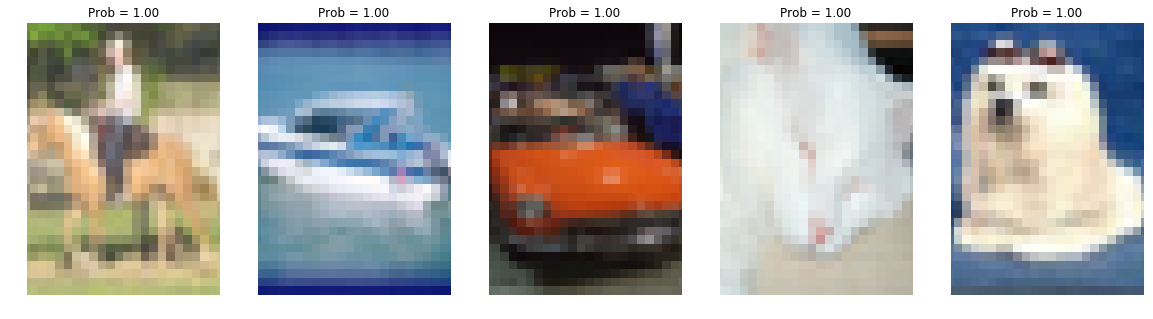

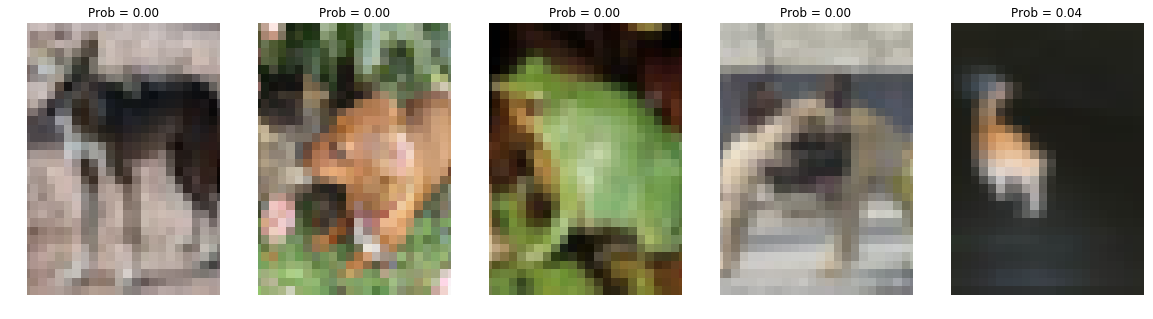

In [4]:
# plot most accurately classified images
k = 5
ind_order = np.argsort(testprobs_True)
ind_topk = ind_order[-k:]
fig, axs = plt.subplots(1, k, sharey=True, figsize=(20, 5))
for i in range(k):
    ith = ind_topk[i]
    axs[i].imshow(testdata[ith])
    axs[i].set_title("Prob = %.2f" % testprobs_True[ith])
    axs[i].axis('off')
    
plt.show()


# plot least accurately classified images
ind_lowk = ind_order[:k]
fig, axs = plt.subplots(1, k, sharey=True, figsize=(20, 5))
for i in range(k):
    ith = ind_lowk[i]
    axs[i].imshow(testdata[ith])
    axs[i].set_title("Prob = %.2f" % testprobs_True[ith])
    axs[i].axis('off')

plt.show()

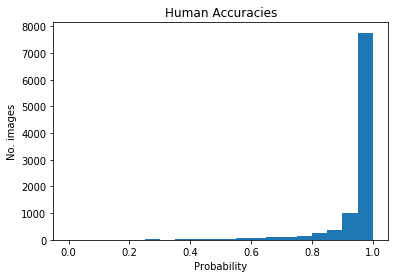

In [7]:
plt.title("Human Accuracies")
plt.hist(testprobs_True, bins=20)
plt.ylabel('No. images')
plt.xlabel('Probability')
plt.show()

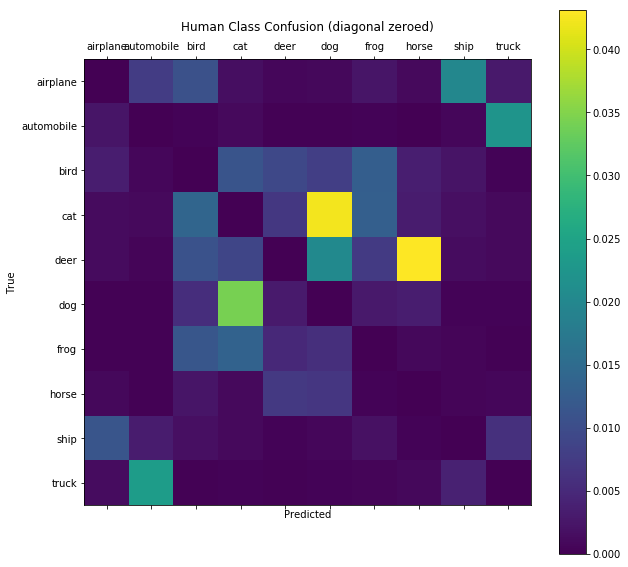

In [6]:
# human annotation accuracy confusion matrix
# dim1 is true class
# dim2 is predicted class
confusion = np.zeros((n_class, n_class))
counts = np.zeros((n_class))

for true, pred in zip(testlabels, testprobs):
    
    confusion[true] += pred
    counts[true] += 1
    
for c in range(n_class):
    
    confusion[c] /= counts
    confusion[c, c] = 0
    

# https://stackoverflow.com/questions/3529666
fig, (ax) = plt.subplots(1, 1, figsize=(10, 10))
cax = ax.matshow(confusion)
ax.set_title("Human Class Confusion (diagonal zeroed)")
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
ax.set_xticks(np.arange(n_class))
ax.set_yticks(np.arange(n_class))
ax.set_yticklabels(class_names)
ax.set_xticklabels(class_names)
fig.colorbar(cax)

plt.show()